In [1]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.tasks import *

from django.db.models import Count, Sum

p = Project.objects.get(pk=147)
qid = 6299


In [2]:
# Define some snappy names that will fit on the plots
# TODO: Someone should choose these carefully
short_name_dict = {
    "Sufficiency and distributional analyses in the demand side of climate change mitigation":"Sufficiency",
    "Determinants of low-carbon transport mode adoption: Systematic review of reviews": "Transport",
    "Status consciousness in energy consumption decisions: A systematic review of literature": "Status",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions-II": "SDG Diets II",
    "Well-being/demand side search query": "Well-being",
    "Working time reduction in climate change mitigation (same paper, diff query)":"Working Time",
    "Working time reduction in climate change mitigation": "Working Time",
    "Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development": "Indigenous Knowledge",
    "Dematerialisation and sharing of goods: a systematic review of the determinants and magnitude of the indirect impacts on energy consumption":"Dematerialising & Sharing",
    "Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions": "Food Behaviour",
    "Disruptive consumer innovations for climate change": "Disruptive Innovations",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions": "SDG Diets",
    "A literature survey on demand-side solutions for climate-change mitigation": "Literature Survey",
    "Urban energy demand in global south cities": "Global South Cities",
    "A Systematic Review for The Equity of Health Burdens Caused by Climate Change": "Health Equity",
    "Drivers for Behavioural Change": "Behavioural Drivers",
    "The potential for teleworking": "Teleworking"
}

In [3]:
qs = Query.objects.filter(
    project=p,
).exclude(
    pk__in=[6262,6265,6256,6263,6260,6303,6299,6270]
).order_by('r_count')

qdicts = []
for q in qs:
    for q2 in qs:
        if q==q2:
            continue
        d1 = set(q.doc_set.all().values_list('pk', flat=True))
        d2 = set(q2.doc_set.all().values_list('pk', flat=True))
        docs = d1 & d2
        qd = {
            'q1': short_name_dict[q.title],
            'q2': short_name_dict[q2.title],
            'q1_total': len(d1),
            'q2_total': len(d2),
            'ndocs': len(docs)
        }
        qdicts.append(qd)
        
ldf = pd.DataFrame.from_dict(qdicts)

ldf.head()   

,ndocs,q1,q1_total,q2,q2_total
0,0,Disruptive Innovations,34,Dematerialising & Sharing,159
1,0,Disruptive Innovations,34,Well-being,502
2,0,Disruptive Innovations,34,Global South Cities,691
3,0,Disruptive Innovations,34,Health Equity,730
4,0,Disruptive Innovations,34,Teleworking,995


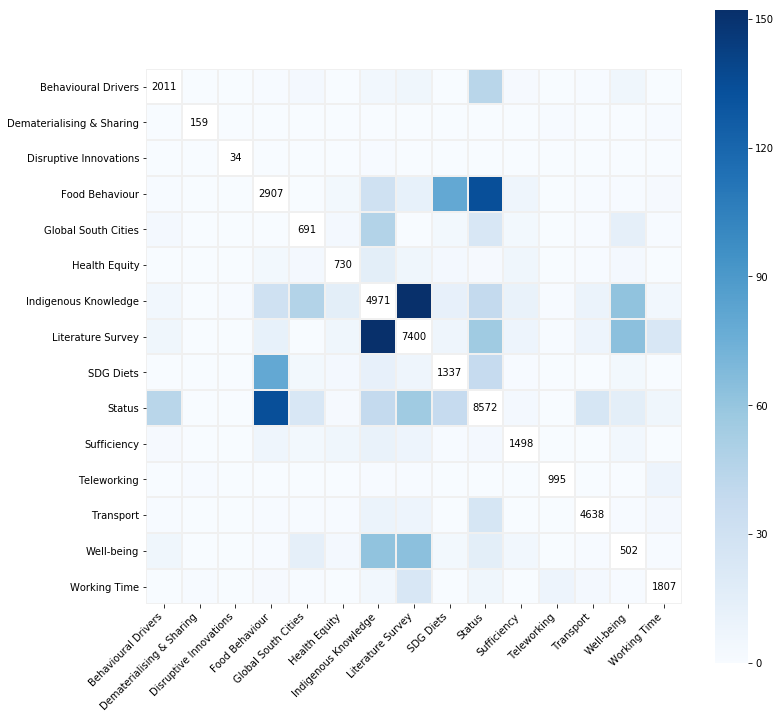

In [4]:
fig, ax = plt.subplots(figsize=(12,12))

df = ldf.pivot(index="q1",columns="q2",values="ndocs")
import seaborn as sns
ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45,ha="right") 
for i, (name,qt) in enumerate(ldf.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center")

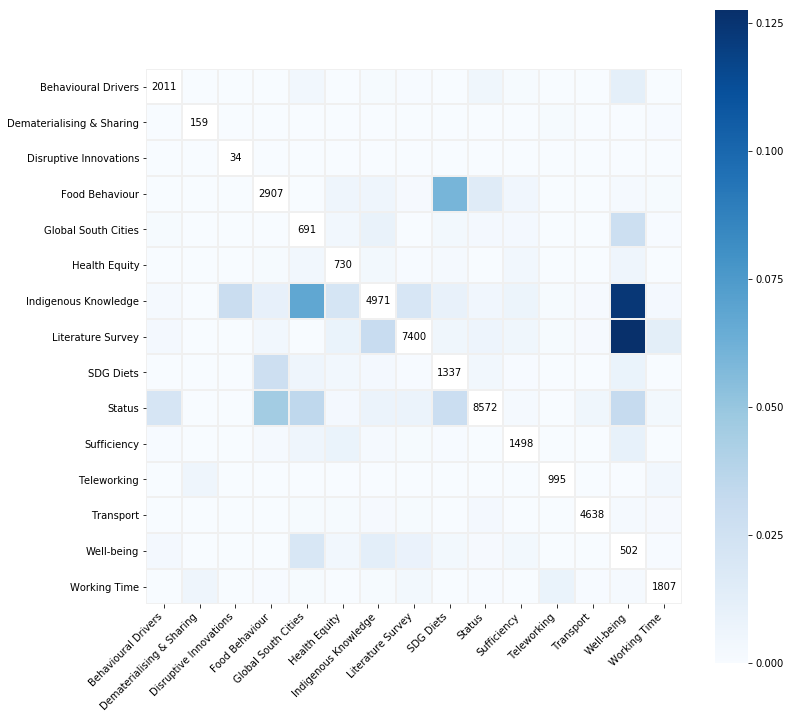

In [5]:
# Now we show column shares
fig, ax = plt.subplots(figsize=(12,12))
ldf['q_share'] = ldf['ndocs'] / ldf['q2_total']
df = ldf.pivot(index="q1",columns="q2",values="q_share")


ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xticks(rotation=45,ha="right") 
plt.xlabel("")
plt.ylabel("")
for i, (name,qt) in enumerate(ldf.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center")
    


In [6]:
p2 = Project.objects.get(pk=148)
all_qs = list(qs) + list(p2.query_set.filter(
    database="WoS",title__iregex="^[a-z]\."
).order_by('title'))
qdicts = []

for q in all_qs:
    try:
        t1 = short_name_dict[q.title]
    except:
        t1 = q.title[:2]
    for q2 in all_qs:
        if q==q2:
            continue
        d1 = set(q.doc_set.all().values_list('pk', flat=True))
        d2 = set(q2.doc_set.all().values_list('pk', flat=True))
        docs = d1 & d2
        try:
            t2 = short_name_dict[q2.title]
        except:
            t2 = q2.title[:2]
        qd = {
            'q1': t1,
            'q2': t2,
            'q1_total': len(d1),
            'q2_total': len(d2),
            'ndocs': len(docs)
        }
        qdicts.append(qd)
        
ldf_all = pd.DataFrame.from_dict(qdicts)

ldf_all.head()   

,ndocs,q1,q1_total,q2,q2_total
0,0,Disruptive Innovations,34,Dematerialising & Sharing,159
1,0,Disruptive Innovations,34,Well-being,502
2,0,Disruptive Innovations,34,Global South Cities,691
3,0,Disruptive Innovations,34,Health Equity,730
4,0,Disruptive Innovations,34,Teleworking,995


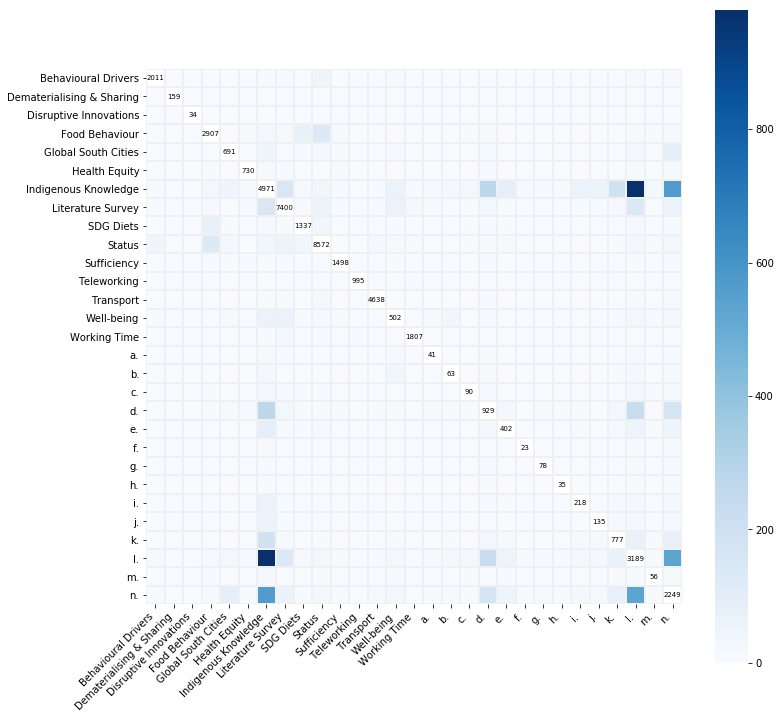

In [7]:
fig, ax = plt.subplots(figsize=(12,12))

df = ldf_all.pivot(index="q1",columns="q2",values="ndocs")
import seaborn as sns
ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45,ha="right") 
for i, (name,qt) in enumerate(ldf_all.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center",fontsize=7)
    
fname = "plots/bibliometrics/overlap_all_ndocs"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

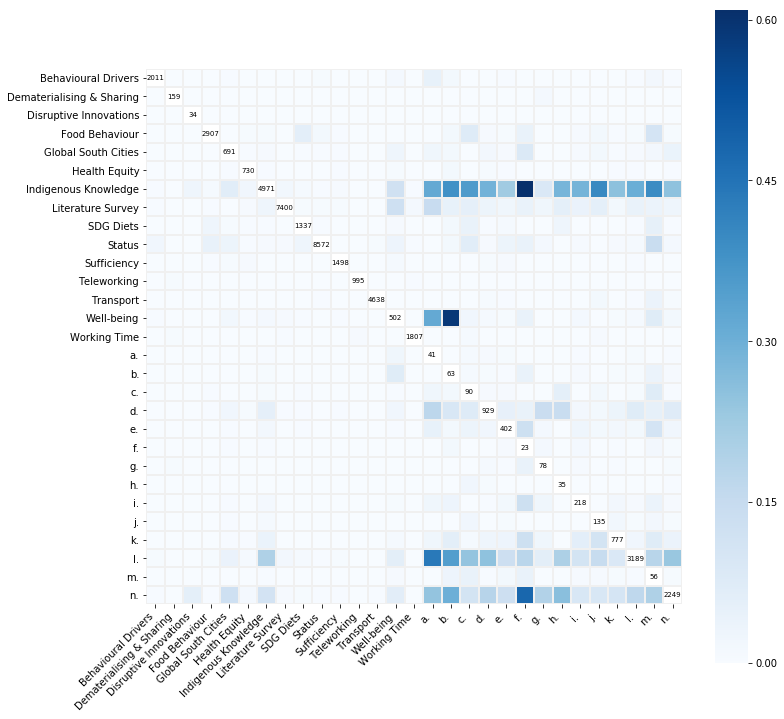

In [8]:
# Now we show column shares
fig, ax = plt.subplots(figsize=(12,12))
ldf_all['q_share'] = ldf_all['ndocs'] / ldf_all['q2_total']
df = ldf_all.pivot(index="q1",columns="q2",values="q_share")


ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xticks(rotation=45,ha="right") 
plt.xlabel("")
plt.ylabel("")
for i, (name,qt) in enumerate(ldf_all.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center",fontsize=7)
    
fname = "plots/bibliometrics/overlap_all_rowshares"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)